# Objetivos

* Mostrar que se puede comprimir de un fichero asignando de descriptores breves (code-words) a los caracteres más frecuentes, y **necesariamente** descripciones más largas a los menos frecuentes.
* Conocer las diferencias entre un código singular, un código decodificable y un código prefijo.
* Saber representar  un código prefijo mediante un árbol.
* Conocer el límite que la desiguladad de Kraft impone a las longitudes de las code-words de un código prefijo.
* Definir la entropía $H$ y conocer sus implicaciones como límite fundamental para la compresión de la información. 
* Mostrar cual es la longitud promedia $L_C$ más corta que se necesita para describir una variable aleatoria y demostrar que la longitud esperada de su descripción debe ser mayor o igual a la entropía (**resultado principal**).
* Establecer la entropía como una medida natural de la longitud de una descripción eficiente.
* Conocer el procedimiento de codificación de Huffman.
* Mostrar que los códigos de Huffman son competitivamente óptimos y que requieren aproximadamente $H$ bits.
* Conocer el procedimiento de codificación de Shanon,

# Códigos

* **Referencia:** *Elements of information theory*, T. Cover and J. Thomas, 2 Edition Ch. 5

## Introducción


* Supongamos un alfabeto $A = \{ \alpha_1 , \ldots, \alpha_M \}$ y un conjunto de símbolos 
$\Sigma = \{ \sigma_1 , \ldots, \sigma_S \}$

* Una codificación de $A$ en términos de $\Sigma$ es una representación donde a cada 
$\alpha_j \in A$ se le hace **corresponder** una secuencia de longitud variable  $\beta_ j$ tal que $\beta_j = (\sigma_{j_1} \cdots \sigma_{j_l} )$ con $\sigma_j \in \Sigma$

* Al conjunto $C = \{ \beta_1 \cdots  \beta_M  \}$ se denomina un código y a cada uno de sus elementos $\beta_j$  una *code-word*

**Ejemplo:**
Sea $A$ el subconjunto de caracteres ASCII,  A ={a, b, c, d}, y $\sigma$ el conjunto de símbolos binarios  $\Sigma = \{0,1 \}$. El código $C= \{ 0, 10, 110, 111 \}$ es la correspondencia
>
> \begin{eqnarray}
    a = \alpha_1 &  \mapsto & \beta_1 =  & 0 \\
    b = \alpha_2 &  \mapsto & \beta_2 = & 10 \\
    c = \alpha_3 &  \mapsto & \beta_3 = & 110 \\
    d = \alpha_4 & \mapsto & \beta_4 = & 111 
 \end{eqnarray}


*  El código $C$ del ejemplo anterior es un **código prefijo (o instantáneo)**: ninguno *code-word*  $\beta_i \in C$ es un prefijo
de ningún otro *code-word* $\beta_j$ con $i\neq j$. 

   Un código instantáneo se puede decodificar sin referencia a futuros *code-words* ya que el final de un *code-word* es *inmediatamente* reconocible. Por lo tanto, para un código instantáneo, todo $\beta_i$ se puede decodificar tan pronto como lleguemos a su final.


**Ejemplo:**
Sea el alfabeto $A= \{a,b,c,d \}$, el código $C= \{ 0, 01, 011, 0111 \}$ tal que
>
>\begin{eqnarray}
    a & \mapsto & 0 \\
    b & \mapsto & 01 \\
    c & \mapsto & 011 \\
    d & \mapsto & 0111 
\end{eqnarray}
>
>es **decodificable** sin ambigüedad, pero no es un código de prefijo (o instantaneo).
> La code-word correspondiente a $a$ (0) es prefijo de la correspondiente a $b$ (01). Esto implica que no podemos decodificar  instantáneamente $a$ sin esperar al siguiente bit de datos (para determinar si realmente corresponde a  $a$ o solo es *la primera mitad* de $b$).
>

**Ejemplo:**
Suponga el alfabeto $A=\{1,2,3,4\}$. En la siguiente tabla se muestran cuatro ejemplos de difrentes tipos de códigos: singular, no-singular y no decodificable, decodificable y prefijo.
>| X| Singular | No-singular & no decodificable | Decodificable | Prefijo|
>|---------| :---------:|:---------------------------:|:---------------:| :-------: |
>|1 | 0 | 0| 10 |0 |
>|2 | 0 | 010 | 00 | 10 |
>|3 | 0| 01 | 11 | 110 |
>|4 | 0 | 10 |110 |111 |
>
>* El código $C=\{0, 010, 01, 10\}$ es no-decodificable porqué dada la cadena codificada 010 no se puede saber si corresponde a la secuencia de caracteres del alfabeto 131  o a al caracter 2. 
>* Notad que  los códigos $\text{Prefijos} \subset \text{Decodificables} \subset \text{No-decodificables} \subset \text{Singulares}$ 

* Podemos representar un código prefijo $C$ como las **hojas** de un árbol $T_C$ donde cada nodo interno tiene  $S = |\Sigma|$ hijos. 
Cuando el conjunto de símbolos $\Sigma = \{ 0, 1 \}$ sea binario, la representación del código $C$ es un árbol binario.
Por tanto en el árbol $T_C$ de un código prefijo **no** puede haber ningún *code-word* que sea antecesor de otro *code-word*.


**Ejemplo:** 
El *código prefijo binario* $C= \{ 0, 10, 110, 111 \}$ se representa por las hojas del árbol binario
><pre>
>      -
>    /    \     
>   0      -
>         /    \
>       10       -
>              /   \
>            110   111
></pre>
> Notad como la longitud $l_i$  de cada hoja $\beta_i$ del árbol $T_C$ corresponde a su profundidad en el árbol. Por ejemplo, en el código anterior al ser $l=3$ la longitud de la *code-word* $\beta_{110}$, su hoja correspondiente se encuentra a profundidad 3.




## Desigualdad de Kraft

Suponga que deseamos codificar un alfabeto con un código prefijo tal que la longitud de sus code-words sea la mínima posible. Está claro que no podemos asignar *code-words* de longitud reducidas a todos los símbolos del alfabeto y pretender que el código siga siendo un prefijo. El conjunto de longitudes de code-words posibles para códigos instantáneos está limitado por la desigualdad de Kraft.

* Suponga el código $C = \{ \beta_1, \beta_2, \cdots, \beta_M \}$ sobre un un conjunto de símbolos binarios $\Sigma = \{0 , 1 \}$ y cuyas longitudes son $\{ l_1, l_2 , \cdots, l_M \}$. La desigualdad de Kraft establece 

$$
\sum_{1}^{M} 2^{-l_i} \leq 1
$$

* La desigualdad de Kraft:
 * Es **condición necesaria** para que un código sea un código prefijo.
 * Es **condición suficiente** para que exista algún código prefijo con la secuencia de longitudes $l_1, l_2, \ldots, l_M$


**Pero mucho cuidado!!!:**  Dado un código $C$ con longitudes $l_1, l_2, \cdots, l_M$ que cumpla la desigualdad de Kraft, **no** podemos afirmar que sea un código prefijo. Aunque **sí** podemos afirmar que existe un código prefijo con esas mismas longitudes  $l_1, l_2, \ldots, l_M$.


**Ejemplo:**
>El código prefijo: $C= \{ 0, 10, 110, 111 \}$ **sí** cumple la desigualdad de Kraft
>
>$$
2^{-1} + 2^{-2} +  2^{-3} + 2^{-3} = 1 \leq 1
$$
> Recuerda que es condición necesaria para que un código sea prefijo cumplir la condición de Kraft

**Ejemplo:**
> El código $C= \{ 0, 01, 011, 111 \}$ **sí** cumple la desigualdad de Kraft pero **no** es un código prefijo. **No**
es suficiente con cumplir la desigualdad de Kraft para que sea un código prefijo.
Sin embargo, sabemos que debe existir un código prefijo con longitudes $1, 2, 3$ y $3$ que sea un código prefijo (por ejemplo el código prefijo $\{ 0, 10, 110, 111 \}$ tiene las mismas longitudes que el código $C$).


<div class="alert-success">

**Demostración desigualdad de Kraft**

Referencia: Elements of information theory, Chapter 5, p. 108, 2 Edition


Sea $l_{max}$ la longitud del mayor de los *code-words* $\beta_i$ almacenados en un árbol $T_C$, y, por tanto, la profundidad del árbol $T_C$.
El número máximo de hojas en el último nivel (y por tanto el máximo número de codewords que se podrían almacenar en el árbol)
será $2^{l_{max}}$.
El resto de codewords de $C$ con longitud $l_i$ se hallarán en el árbol a una profundidad $l_i$, o lo que es lo mismo, a una profundidad $l_{max} - l_{i}$  contandando desde la máxima profundidad (no desde la raíz de $T_C$).
Cada uno de estos nodos tendría como máximo $2^{l_{max} - l_{i}}$ descendientes en el último nivel. Por tanto la suma de los descendientes de lo $M$ nodos no podrá ser superior a todos los nodos del último nivel.  
(Fíjate que si hay mas descendientes es que **necesariamente** un *code-word* es antecesor de otro *code-word* y *contarían doble sus sucesores*, mira el ejemplo)

$$
\sum_{i=1}^{i=M} 2^{ l_{max}-l_i} \leq 2^{l_{max}}
$$
dividiendo ambos miembros por $2^{l_{max}}$ obtenemos la desigualdad de Kraft
$$
\sum_{1}^{M} 2^{-l_i} \leq 1
$$

**Ejemplo:**
><pre>
      -
    /    \     
   0      -
         /   \
       10      -
             /   \
           110   111
</pre>

>En el árbol prefijo anterior $l_{max}=3$
\begin{eqnarray}
l_{0}  = 1  \longrightarrow & l_{max} - l_0 = 2 & \, \, \,  \text{sucesores_posibles} = 2^2 \\
l_{10} = 2  \longrightarrow & l_{max} - l_0 = 1 & \, \, \,  \text{sucesores_posibles} = 2^1 \\
l_{110} = 2 \longrightarrow & l_{max} - l_0 = 0 & \, \, \,  \text{sucesores_posibles} = 2^0 \\
l_{111} = 2 \longrightarrow & l_{max} - l_0 = 0 & \, \, \,  \text{sucesores_posibles} = 2^0 
\end{eqnarray}
> Sin embargo, en el árbol siguiente 0 es antecesor de 01 y 00. Al contar los sucesores de estos 3 nodos *contribuirían* con 4 nodos mas al último nivel!! y, por tanto, no se satisface la desigualdad de Kraft
><pre>
       -
    /     \     
   0       -
 /  \     /  \
00   01  10    -
             /   \
           110   111
</pre>

</div>

## Compresión:

* Supongamos que un fichero $F$ está compuesto por los caracteres de un alfabeto $A = \{ \alpha_1 , \ldots ,α_M \}$ donde cada carácter $\alpha_j$ aparece en $F$ con frecuencia (absoluta) $f_j$.

* Si $C = \{ \beta_1 , \ldots, \beta_M \}$ es un *código prefijo binario* (CPB) para el alfabeto $A$ y denotamos por  $l_j$ al tamaño de la code-word $\beta_{j}$, el tamaño del fichero $\tau( F)$ en bits cuando se codifica con el código $C$ será
\begin{equation}
\tau(F) = \sum_1^M  f_j l_j
\end{equation}

* Además, las frecuencias relativas $p_j = \frac{f_j}{N}$ donde $N$ es el número total de caracteres en $F$, constituyen una distribución de probabilidad discreta $P= \{p_0, p_1, \ldots, p_M \}$ de una variable aleatoria $X$ cuyo dominio son los valores del alfabeto $A = \{ \alpha_1 , \ldots ,\alpha_M \}$ .
 Por tanto  si comprimimos $F$ con un *código prefijo binario*, la longitud promedio (también llamada esperada) de las *code-words* será: 
\begin{equation}
\text{L}_C = \sum_1^M p_j l_j 
\end{equation}

 **Ejemplo:**
Suponga el fichero $F$ con $N=1000$ caracteres de un alfabeto $A=\{1, 2, 3, 4 \}$ cuyas frecuencias absolutas son
500, 250, 125 y 125 respectivamente ¿Cúal será la longitud promedio $L_C$ cuando se codifique con el código $\text{PCB}$  $C=\{0, 10, 110, 111 \}$
> $$
\text{L}_C = 1 \times \frac{1}{2} + 2 \times \frac{1}{4}  + 3 \times \frac{1}{8} + 3 \times \frac{1}{8} = 1.75 \, \text{bits}
$$

* Pregunta natural : Dado un fichero $F$ sobre un alfabeto $A$ ¿Cómo elegir el código $C$ de tal forma que $\tau(F)$ sea mínimo? Esto es equivalente a preguntarnos, dado un fichero $F$  ¿Cúal es el código cuyo árbol $T_C$ proporciona una longitud esperada mínima $L_C$ para dicho fichero?  

    No lo sabemos. Intentaremos una estrategia codiciosa para encontrarlo.
  
 **Ejemplo:**
 Suponga un fichero $F$ con el alfabeto $A= \{ a, b, c, d, e, f, g \}$ y frecuencias absolutas  10, 15, 12, 4, 3, 13, 1. Proponga una estrategia codicioso para hallar un código prefijo que optimice la compresión de $F$.
 
> Se proponen dos alternativas:
> * Idea codiciosa 1: Colocar los símbolos como las hojas de un árbol binario con profundidad $l_{max} = \log M$ siendo $M$ el número de caracteres en el alfabeto.
> * Idea codiciosa 2: Asignar un bit al carácter más frecuente, dos al segundo y así sucesivamente. 
> 
> <pre>
>         codicioso 1                            codicioso 2
               
                   -                                      -
            /            \                              /   \  
           -              -                            b     -   
         /   \          /    \                         0    /  \
        -      -       -      g                            f    -
      /  \    /  \    /  \     11                         10   /  \
     a    b   c   d   e   f                                  c     -
    000  001  010 011 100 101                               110   /  \
                                                                 a    -
                                                               1110  /  \
                                                                    d    -
                                                               11110    /  \
                                                                       e    g
                                                                   111110  111111 
</pre>
> $\tau_1(F) = 3\times 57+2 \times 1 =173$ y en el segundo caso  $\tau_2(F) = 1 \times 15 +2 \times 13 + ... $       >                                                               
> * **Ninguna de las dos ideas anteriores es óptima. La solución es el algoritmo de Huffman**.
 
## Algoritmo de Huffman:


* El código $C$ lo creamos en dos pasos:
 * En un primer paso creamos el árbol (algoritmo de Huffman)
 * En un segundo paso recorremos el árbol para asignar los *code-words* a cada uno de los caracteres. 
 
  **Creación del árbol**
  * Notad como la evolución del algoritmo paso a paso que se muestra en el siguiente ejemplo se corresponde con el pseudocódigo (Nota: en el pesuocódigo se asume que el conjunto de símbolos es binario $\Sigma=\{0, 1\}$)

```python

def Huffman (A: alfabeto)
    M = |A| 
    
     # Crea una cola de prioridad según la frecuencia  de los caracteres de A. 
     # Cada uno de los caracteres será un subŕbol con un único nodo (hoja) 
     pq = priority_queue (A)

     while q is not empty:
        
        # se crea un subarbol z
        z = root()
        
        # extraer secuencialmente dos elementos de PQ y asignarlos como hijos de z
        z.left = pq.extract ()
        z.right = pq.insert ()
        
        # Asignar como prioridad de z la suma de las prioridades de sus hijos
        f[z] = f[x] + f[y]
        
        # Insertar el subárbol z en la cola de prioridad
        pq.insert (z)
        
     return pq.extract() #devolver la raíz del árbol
```
   **Recorrido del árbol**
   * Una vez creado el árbol se recorre para codificar los caracteres que están en las hojas (por ejemplo si recorremos una rama izquierda asignamos un 0 y si recorremos una derecha un 1). 
   
**Demostración Algoritmo de Huffman**  
   * Ver transparencias.
    
**Ejemplo:** Construya el código deHuffman para el alfabeto $A=\{a,b,c,d,e,f,g \}$ con frecuencias $\{10,15, 12,4, 3,13,1\}$ 

<pre>

a(10)       b(15)           c(12)          d(4)      e(3)         f(13)     g(1)         
 |            |                |             |         |___________|___________|
 |            |                |             |              |      |
 |            |                |             |            A(4)     |
 |            |                |             |              |      |
 |            |                |             |______________|      |
 |            |                |                  |                |
 |            |                |                  B(8)             |
 |____________|________________|__________________|                |
              |                |         |                         |
              |                |        C(18)                      |
              |                |         |                         |
              |                |_________|_________________________|
              |                          |              |
              |                          |             D(25)
              |                          |              |
              |__________________________|              |
                       |                                |
                       E(33)                            |
                       |________________________________|
                                      |
                                      F(58)
              
  </pre>      
 <pre>
                                       F
                                   /        \
                                  /          \
                                 E            D
                               /   \         / \  
                              /     \       /   \
                            b         C    c     f
                           (00)     /  \  (10)  (11)
                                   /    \ 
                                  a      B
                                (010)   /  \
                                       /    \
                                      d      A
                                    (010)  /   \
                                          e     g 
                                      (01110)  (01111)
                                          
 </pre>
 
**Ejercicio:**

Suponga un alfabeto de tamaño $M=2^N$ cuyos caracteres tienen todos la misma frecuencia. ¿Cúal es la forma del árbol $T_C$ cuando se codifica con el algoritmo de Huffman?
>
>Es fácil deducir que el árbol será un árbol binario completo con $M=2^N$ hojas. Por tanto todas las code-words del código tendrán longitud $l_{max} = N$ y al tener todos los caracteres la misma frecuencia la longitud promedio será $L_C = l_{max}$.
>
>Por ejemplo supongamos el caso N=2
>
<pre>

 a    b     c      d                  -
 |____|     |______|               /     \
    |___________|                 -       -
          |                     /  \     /  \
                               a   b    c     d
                             (00) (01) (10)  (11)
</pre>          
 
### Propiedades


* Puede haber diferentes $\text{CPBs}$ Huffman para un mismo fichero $F$.  Por ejemplo cambiando los 1 por 0 (reflexión), o cambiando la asignación izquierda por derecha en cada iteración del bucle, o según como *emparejemos* cuando varios sub-árboles tengan la misma frecuencia (**ver el siguiente ejercicio**)

* La codificación Huffman requiere tres pasos:
    * Un paso por $F$ para calcular la frecuencia de los caracteres.Coste $O(N)$ si $F$ tiene $N$ caracteres.
    * El cálculo de crear el árbol $O(M \log M)$ si almacenamos los meta-caracteres (nodos) en un min–heap.
    * Un segundo paso por F para comprimirlo con coste $O(N)$.
    * El coste total es $O(N)$ pero con dos pases por el fichero $F$ .
* Hay alternativas en un solo paso, tales como la familia de algoritmos de compresión Lempel–Ziv



**Ejercicio:**

Suponga un alfabeto $A=\{a, b, c, d\}$ con frecuenias $\{2,2,1,1\}$ respectivamente. Proporcione un codogo de Huffman

> Una posibilidad podría ser
<pre>

   a(2)     b(2)   c(1)    d(1)                 -
    |        |      |________|                /    \
    |        |          |                    a      -
    |        |          A(2)                (0)   /   \
    |        |___________|                       b     -
    |              |                            (10)  /  \
    |             B(4)                               c    d 
    |______________|                              (110)   (111)
            |
            C(8)
 </pre>
 
 > Pero también es válido el códogo de Huffman: 
 
 <pre>
 a(2)     b(2)   c(1)    d(1)                  -
    |_______|     |________|                /     \
        |              |                   -        -
       B(4)          A(2)                /   \    /   \
        |______________|                a     b   c    d
              |                      (00)   (01) (10)  (11)
             C(8)                         
 </pre>

## Entropía:
Si tenemos una distribución discreta $P= \{ p_0, p_1, \ldots, p_M \}$ se define la Entropía como

$$
H = \sum_{1}^{M} p_i \log \left( \frac{1}{p_i} \right)  = - \sum_{1}^{M} p_i \log \left( p_i \right)
$$

* Intuitivamente, podemos pensar para cada uno de los caracteres $\alpha_i$   que aparece en $F$ con probabilidad $p_i$, se necesita $\log (1/p_i)$ bits para ser almacenado.
* Los carácteres que *necesitan mas bits para ser codificados* aportan *más información* $\to$  son los caracteres menos frecuentes!!.
* Por tanto, la entropía $H$ es la información media (promedio) medido en bits necesaria para describir (codificar) el proceso
$A = \{ \alpha_1, \alpha_2, \ldots, \alpha_M \}$ en el fichero.

### Propiedades de la Entropía

* $H(P) \geq 0$ para cualquier distribución discreta $P$.

* $H(0, . . . , 1, . . . , 0) = 0$.
    
    En otras palabras, dado que en realidad solo aparecerá uno de los caracteres $M$, no hay información en el conjunto de caracteres.

* En la siguiente gráfica se ha representado $\log \left( \frac{1}{p} \right)$ en función de la probabilida $p$ (ver figura a continuación).
Como se observa a medida que  disminuye la probabilidad $p_i \to 0$ de un caracter se necesitan mas bits para describirlo, y por tanto, aumenta la información.

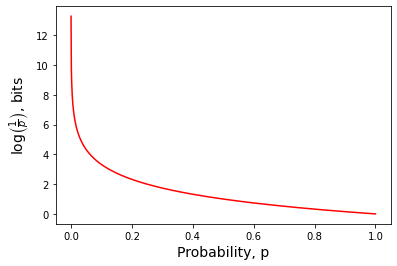

In [3]:

# Entropy
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0.0001,1,1000)

# the function, which is y = x^2 here
y =  np.log2(1./x)

fig = plt.figure()

# plot the function
plt.plot(x,y, 'r')
plt.xlabel (f'Probability, p', fontsize=14)
plt.ylabel (r'$\log \left( \frac{1}{p} \right)$, bits', fontsize=14)


# show the plot
plt.show()




*  Suponga un fichero $F$ donde todos los caracteres de su alfabeto $A=\{ \alpha_1, \alpha_2,\ldots, \alpha_M \}$ tienen la misma probabilidad $p_i=\frac{1}{M}$, es decir, que se distribuyen con distribución uniforme. Su entropía será  $H \left(\frac{1}{M}, \frac{1}{M}, \ldots, \frac{1}{M} \right) = \log \left(M \right)$ 

<div class="alert alert-block alert-info">

**Proposición.** 
    
La distribución uniforme tiene la mayor entropía; es decir, se verifica $H(P) ≤ \log M$ para cualquier distribución $P$
</div>

**Ejercicio:** Suponed un alfabeto con dos símbolos $A=\left\{ \alpha_1, \alpha_2  \right\}$ y con proabilidades  $P= \left\{ p, (1-p)  \right\}$. Representar la entropía para el rango de valores de $p \in [0, 1] $.

> En este caso la entropía será
$$
H = \sum_{i=1}^{2} p_i \log \left( \frac{1}{p} \right) = p \log \left( \frac{1}{p} \right) + (1-p) \log\left( \frac{1}{1-p} \right)
$$

El siguiente código se ha utilizado para representar la entropia de un alfabeto binario en función de la probabilidad de los caracteres.
 * La entropía es un función cóncava.
 * La entropía $H\leq 1$ bits alcanzando su valor máximo cuando los valores del alfabeto son equiprobables ($p=0.5$).  
 * Para $p=0$ (o $p=1$) el fichero no tiene información ($H=0$ bits).
 * Notad como una codificación de Huffman requería 2 bits ($L_C = 2$)

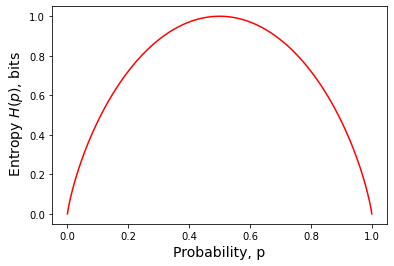

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
p = np.linspace(0.00001,0.99999,1000)

# the function, which is y = x^2 here
H =  p * np.log2(1./p) + (1-p) * np.log2(1/(1-p))

fig = plt.figure()

# plot the function
plt.plot(p ,H, 'r')
plt.xlabel (f'Probability, p', fontsize=14)
plt.ylabel (r' Entropy $H(p)$, bits', fontsize=14)


# show the plot
plt.show()



### Entropía y compresión óptima



* Si comprimimos $F$ con un código $\text{CPB}_C$ de $M$ símbolos con $l_i$ bits, la longitud media de caracteres en bits $L_C$ es:

$$
L_C = \sum_i \left( \frac{f_i}{N} \right) l_i     
$$

donde $N$ es el total de caracteres en $F$ y $f_i$ las veces que aparece el caracter $\alpha_i$

<div class="alert alert-block alert-info">
    
**Teorema Principal**
    
Para cualquier código $\text{CPB}_C$, se tiene

$$
L_C \geq H \left( p_0, p_1, \ldots, p_M \right)
$$

En otras palabras, la entropía $H$ de las frecuencias relativas de caracteres en un archivo **limita (es una cota inferior)** al promedio mínimo de bits por carácter.


\begin{align}
    \text{ Menor entropia} & <=> \text{ Mayor redundancia} <=> \text{Mayor compresibildad} \\
    \text{ Mayor entropia} & <=> \text{ Menor redundancia} <=> \text{Menor compresibilidad} 
\end{align}

</div>
    
* Podemos definir la **eficiencia** de una codificación concreta como $\eta = \frac{H(P)}{L}$. Un código eficiente $\eta \to 1$

**Ejemplo**
 
Sea el alfabeto $A = \{1, 2, 3, 4 \}$ tal que su probabilidad de aparición en un fichero $F$ es $P=\{1/2, 1/4, 1/8, 1(8\}$. Suponga el código $C=\{0, 10, 110, 111 \}$. Calcular la entropía de $F$ y la eficiencia del código.  

> $X$ es una variable aleatoria con la siguiente distribución 
>
>\begin{eqnarray}
Pr (X=1) & = \frac{1}{2}, \, \, \, \,  1 \mapsto  & 0 \\ 
Pr (X=2) & = \frac{1}{4}, \, \, \, \, 2 \mapsto & 10  \\
Pr (X=3) & = \frac{1}{8}, \, \, \, \, 3 \mapsto & 110  \\
Pr (X=4) & = \frac{1}{8}, \, \, \, \, 4 \mapsto  & 111  
\end{eqnarray}
>
>La entropía $H(X)$ es 1.75 bits, la lóngitud esperada para este código $L_C = E\left[ l(X) \right]$ es también 1.75 bits. Es decir este código tiene la misma longitud media que la entropía. Cualquier secuencia de bits puede ser decodificada sin ambiguedad en una secuencia de símbolos de $X$ . Por ejemplo la secuencia 0110111100110 se decodifica como 134213.

<div class="alert-success">

**Demostración del Teorema Principal**


Tratamos de hallar los valores de $l_i$ que minimizan la longitud promedio de un código CPB. Por tanto debemos minimizar la expresión
\begin{equation}
L = \sum p_i l_i
\end{equation}
para todos los enteros $l_1, l_2, \ldots, l_m$ sujeto a la restricción (desiguldad de Kraft)  $\sum 2^{-l_i} \leq 1$. Para resolver este problema de optimización utilizaremos multiplicadores de Lagrange. 
Construyamos el lagrangiano 
\begin{equation}
J =  \sum p_i l_i + \lambda \left( \sum 2^{-l_i}  \right)
\end{equation}
y derivemos respecto a $l_i$, para obtener las $m$ ecuaciones
\begin{equation}
\frac{\partial J}{\partial l_i} = p_i - \lambda \,  2^{-l_i}  \log_e 2
\end{equation}
 
Igualando las ecuaciones anteriores a 0 obtendríamos los valores mínimos $l_i$
\begin{equation}
 2^{-l_i} = \frac{p_i}{\lambda \,  \log_e 2}
\end{equation}
Para eliminar el multiplicador $\lambda$ sustituimos en la desiguadad de Kraft, obteniendo finalmente los valores mínimos para las longitudes $l_i$

\begin{equation}
l_i^* = - \log p_i = \log \left( \frac{1}{p_i} \right)
\end{equation}

 </div>

**Ayuda para los problemas**

El siguiente código Python define las funciones `entropy()` y `inequality_kraft()` para calcular la entroṕia de un fichero, la longitud media de un código $L_C$ y el valor de la desigualdad de Kraft para dicho código $C$.  Se proporcionan varios ejemplos de uso. Úsalo para verificar el resultado de los problemas inclídos en la hoja de problemas.

In [7]:
import numpy as np
from typing import Set #for annotate set
from typing import List #for annotate List

entropy = lambda p: sum(p* np.log2(1/p)) 

def inequality_kraft (code:Set[str], p:List[float]):
    long = np.array( [len(codeword) for codeword in code] )
    
    kraft = sum(1./np.power(2, long)) 
    l_average = sum(long * p)
    
    return l_average, kraft, long 
    

##------- Driver programm
    

# Huffman code 1
code = {'00', '01','10', '11'}
p = np.array([2/6, 2/6, 1/6, 1/6]) 

l_average, kraft, long = inequality_kraft (code, p)
H = entropy (p)
print(f'Huffman_1:\n L: {l_average} H:{H} Kraft:{kraft} l:{long}')

# Huffman code 2
code = {'0', '10','110', '111'}
p = np.array([2/6, 2/6, 1/6, 1/6]) 

l_average, kraft, long = inequality_kraft (code, p)
H = entropy (p)
print(f'Huffman_2:\n L: {l_average} H:{H} Kraft:{kraft} l:{long}')


Huffman_1:
 L: 1.9999999999999998 H:1.9182958340544891 Kraft:1.0 l:[2 2 2 2]
Huffman_2:
 L: 2.1666666666666665 H:1.9182958340544891 Kraft:1.0 l:[3 1 2 3]


### Codificación de Shanon-Fano-Elias 


* En general $\log \left( \frac{1}{p_i} \right)$  no será un entero pero $\lceil \log  \frac{1}{p_i}  \rceil$  sí lo es.
* Los códigos Shannon (o Shannon-Fano-Elias) construyen un CPB con  $\lceil \log  \frac{1}{p_i}  \rceil$  como máximo bits por carácter.
* Si $C$ es un código Shannon, tenemos
\begin{equation}
L_C = \sum p_i  \lceil \log  \frac{1}{p_i}  \rceil  \leq  1 + \sum p_i \log \frac{1}{p_i} 
\end{equation}

* Por lo tanto, el número promedio de bits por carácter en un código de Shannon es como máximo 1 más que el óptimo de entropía.

* Para crear un código Shannon **ver ejemplo en las transparencias**.

### Algoritmo Sardinas-Patterson (Optativo)

El algoritmo Sardinas-Petterson determina si un código es unívocamente decodificable en tiempo polinomial. Se basa en explorar sistemáticamente todas los sufijos de las code-words que tienen como prefijo otra code-word.

Suponga un código C **no** prefijo. Tratamos de determinar si $C$ es unívocamente decodificable. El procedimiento de Sardinas-Patterson es recursivo:

1. Crear el conjunto $S$ cuyos elementos serán los sufijos de las code-words cuyos prefijos estén en $C$. 
  * Si $S$ y $C$ **no** son conjuntos disjuntos (i.e., alguno de los sufijos incluidos en $S$ coincide con alguno de las code-words de $C$)  el código $C$ es **no** decodificable y el algoritmo finaliza. 
  * Sino realizar la unión de $S$ y $C$, $S = S \cup C$

2. Tratad el conjunto $S$ como un nuevo código $C$ y repetir la sentencia 1. El procedimiento es recursivo. Finaliza cuando no se modifica el conjunto $S$ al no incorporarse nuevos sufijos (en este caso el códogo es unívocamente decodificable) o cuando se incorpora un sufijo que ya se encuentra en $S$ (en este caso el código **no** es unívocamente decodificable). 

**Ejemplo:**

Suponga un alfabeto $A = \{a,b,c,d,e \}$ y el código **no** prefijo $C = \{ 1 , 011 , 01110 , 1110 , 10011 \}$ detreminar si es un código decodificable usando el procedimiento de Sardinas-Petterson 
>
>* En el primer paso creamos el conjunto $S$.
Al ser la code-word 1 prefijo de las code-words 1110 y 10011, el conjunto $S$ incluirá los sufijos 110 y 0011. Además la code-word 011 es prefijo de 01110. Por tanto, también debemos incluir en  $S$ el sufijo 10.    
> $S = \{  110, 0011, 10 \}$. Al ser $S$ y $C$ conjuntos disjuntos, realizamos la unión de ambos 
$S=S \cup C =   \{ 110, 0011, 10,  1 , 011 , 01110 , 1110 , 10011 \}$
>
>* En el paso 2 deberíamos incorporar a $S$ el sufijo $011$.  Pero al encontrarse ya $011$ en $S$ el procedimiento finaliza. **El código $C$ no es univocamente decodificable**.


**Ejemplo:**

Suponga un alfabeto $𝐴=\{𝑎,𝑏,𝑐,𝑑\}$ y el código no prefijo $𝐶=\{10,00,11,110\}$ detreminar si es un código decodificable usando el procedimiento de Sardinas-Petterson 
>* En el primer paso creamos el conjunto $S$.
Al ser la code-word 11 prefijo de las code-words 110 el conjunto $S$ incluirá únicamente el sufijo 0. 
> Al ser $S$ y $C$ conjuntos disjuntos, realizamos la unión de ambos 
$S=S \cup C = \{  0, 10,00,11,110\}$.
>* En el paso 2 no se incorpora ningún elemento al **no** ser 0 prefijo de ningun elemento del conjunto unión, por tanto, **el código es decodificable**.

* A continuación se proporciona la [implemantación en Python](https://towardsdatascience.com/the-sardinas-patterson-algorithm-in-simple-python-9718242752c3) del algoritmo de Sardinas-Patterson. Utilízalo para verificar tus resultados  


In [1]:
# Obtained from https://towardsdatascience.com/the-sardinas-patterson-algorithm-in-simple-python-9718242752c3

def generate_cn(c, n):
    if n == 0:
        return set(c)
    else:
        # create a set to hold our new elements
        cn = set()
        
        # generate c_(n-1)
        cn_minus_1 = generate_cn(c, n-1)
        
        for u in c:
            for v in cn_minus_1:
                if (len(u) > len(v)) and u.find(v) == 0:
                    cn.add(u[len(v):])
        for u in cn_minus_1:
            for v in c:
                if len(u) > len(v) and u.find(v) == 0:
                    cn.add(u[len(v):])
        return cn 
        

def generate_c_infinity(c):
    cs = []
    c_infinity = set()
    n = 1
    cn = generate_cn(c, n)
    print('c_{}'.format(n), cn)
    while len(cn) > 0:
        if cn in cs:
            print('Cycle detected. Halting algorithm.')
            break
        else:
            cs.append(cn)
            c_infinity = c_infinity.union(cn)
            n += 1
            cn = generate_cn(c, n)
            print('c_{}'.format(n), c_infinity)
    return c_infinity
    
def sardinas_patterson_theorem(c):
    """
    Returns True if c is uniquely decodable
    """
    c_infinity = generate_c_infinity(c)
    return len(c.intersection(c_infinity)) == 0

def check_decodability(c):
    if sardinas_patterson_theorem(c):
        print(c, 'is uniquely decodable')
    else:
        print(c, 'is not uniquely decodable')
        



#####-------- Driver programm
c = {'1' , '011' , '01110' , '1110' , '10011'}
check_decodability(c) 



c_1 {'0011', '10', '110'}
c_2 {'0011', '10', '110'}
c_3 {'011', '110', '0', '0011', '10'}
c_4 {'110', '0011', '11', '011', '1110', '0', '10'}
c_5 {'110', '0011', '11', '011', '1', '1110', '0', '10'}
c_6 {'110', '0011', '11', '011', '1', '1110', '0', '10'}
Cycle detected. Halting algorithm.
{'10011', '01110', '011', '1', '1110'} is not uniquely decodable
